# Task-01 Prediction using supervised ML
# Intern name- Vibha Kanwar

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploring the dataset

In [5]:
# Returns number of rows and columns of the dataset
df.shape

(25, 2)

In [6]:
# Returns an object with all of the column headers
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [10]:
# Returns true for a column having null values, else false
df.isnull().any()

Hours     False
Scores    False
dtype: bool

### Data Visualization

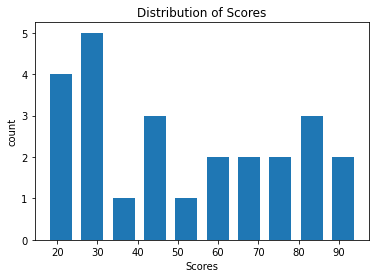

In [9]:
# Visualizing the feature scores
fig = plt.hist(df['Scores'], rwidth=0.7)
plt.title("Distribution of Scores")
plt.xlabel('Scores')
plt.ylabel('count')
plt.show()

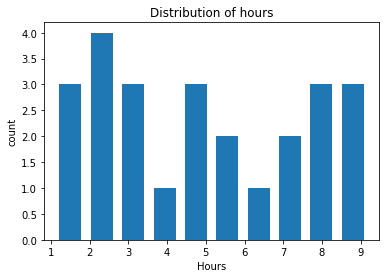

In [10]:
# Visualizing the feature hours
fig = plt.hist(df['Hours'], rwidth=0.7)
plt.title('Distribution of hours')
plt.xlabel('Hours')
plt.ylabel('count')
plt.show()

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

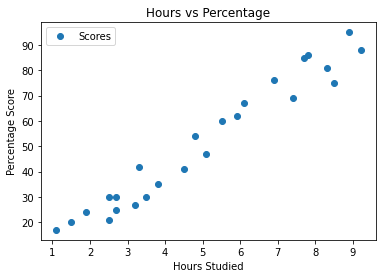

In [12]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the algorithm

 Split data into training and testing sets and now its the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


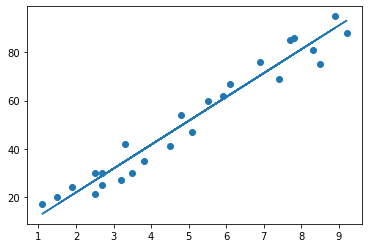

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Testing the data**



In [19]:
# Prediction 1
# Input in the form : hours
hours=7.85
result=regressor.predict([[hours]])
print("HOURS={}".format(hours))
print("Predicted PERCENTAGE={}".format(result[0]))

HOURS=7.85
Predicted PERCENTAGE=79.81681341447624


### **Evaluating the model**

The final step is to evaluate the performance of algorithm by the mean square error. 

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
